 Starting Dual Language Translator - Using Your Text Files...
Dataset loaded successfully with 65 words
System initialized with 65 words


HTML(value="<h1 style='color: #2E86AB; text-align: center;'> Dual Language Translator</h1>")

HTML(value='<h3>Translation Input</h3>')

Label(value='Enter English Word:')

HTML(value='<h3>Translation Results</h3>')

HTML(value='<h4> French:</h4>')

Output()

HTML(value='<h4> Hindi:</h4>')

Output()

HTML(value='<h4>Status:</h4>')

Output()

HTML(value='<h3>Additional Features</h3>')

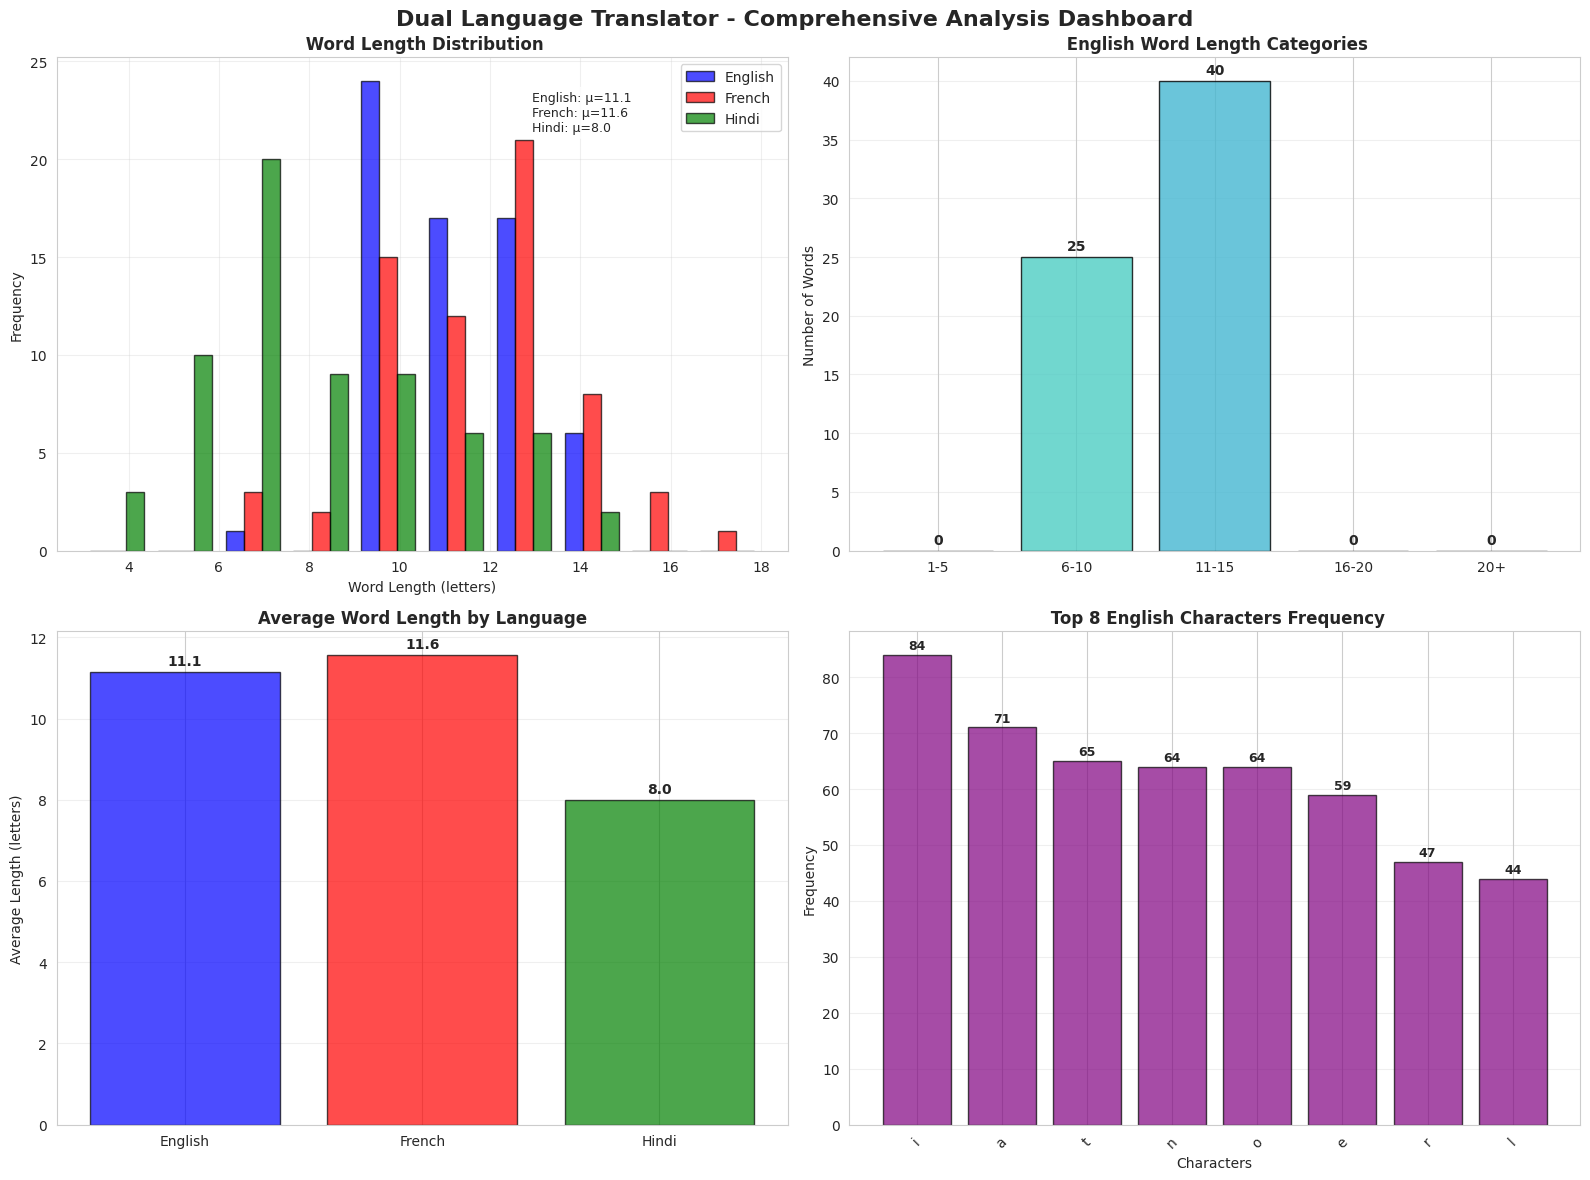

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import time
import warnings
warnings.filterwarnings('ignore')

try:
    from IPython.display import display, clear_output
    import ipywidgets as widgets
except ImportError:
    print("This version requires IPython and ipywidgets.")

class ColabDualTranslatorGUI:
    def __init__(self):
        self.dataset = self.load_dataset_from_files()
        self.initialize_system()
        self.setup_gui()

    def load_dataset_from_files(self):
        """Load dataset from existing text files"""
        try:
            # Read the text files
            with open('english_.txt', 'r', encoding='utf-8') as f:
                english_words = [line.strip() for line in f.readlines() if line.strip()]

            with open('french_.txt', 'r', encoding='utf-8') as f:
                french_words = [line.strip() for line in f.readlines() if line.strip()]

            with open('hindi_.txt', 'r', encoding='utf-8') as f:
                hindi_words = [line.strip() for line in f.readlines() if line.strip()]

            # Create dataset dictionary
            dataset = {}
            for eng, fr, hi in zip(english_words, french_words, hindi_words):
                dataset[eng.lower()] = (fr, hi)

            print(f"Dataset loaded successfully with {len(dataset)} words")
            return dataset

        except FileNotFoundError as e:
            print(f" Error: File not found - {e}")
            print("Please make sure english_.txt, french_.txt, and hindi_.txt are in the current directory")
            return {}
        except Exception as e:
            print(f" Error loading dataset: {e}")
            return {}

    def initialize_system(self):
        """Initialize the translation system"""
        if not self.dataset:
            print(" Failed to initialize system - no dataset available")
            return

        self.english_words = list(self.dataset.keys())
        self.french_translations = [pair[0] for pair in self.dataset.values()]
        self.hindi_translations = [pair[1] for pair in self.dataset.values()]

        print(f"System initialized with {len(self.english_words)} words")

    def setup_gui(self):
        """Setup the GUI using ipywidgets"""
        if not self.dataset:
            display(widgets.HTML("<h2 style='color: red;'> Error: Could not load dataset</h2>"))
            return

        # Create widgets
        self.title = widgets.HTML("<h1 style='color: #2E86AB; text-align: center;'> Dual Language Translator</h1>")

        # Input section
        self.input_label = widgets.Label("Enter English Word:")
        self.input_text = widgets.Text(placeholder="e.g., technology, innovation, management", layout=widgets.Layout(width='400px'))
        self.translate_btn = widgets.Button(description="Translate", button_style='primary')
        self.clear_btn = widgets.Button(description="Clear", button_style='warning')

        # Results section
        self.french_output = widgets.Output()
        self.hindi_output = widgets.Output()
        self.status_output = widgets.Output()

        # Buttons for additional features
        self.stats_btn = widgets.Button(description="Show Statistics", button_style='info')
        self.samples_btn = widgets.Button(description="Sample Words", button_style='info')
        self.plots_btn = widgets.Button(description="Show Plots", button_style='success')
        self.export_btn = widgets.Button(description="Export Data", button_style='warning')

        # Connect events
        self.translate_btn.on_click(self.on_translate)
        self.clear_btn.on_click(self.on_clear)
        self.stats_btn.on_click(self.on_stats)
        self.samples_btn.on_click(self.on_samples)
        self.plots_btn.on_click(self.on_plots)
        self.export_btn.on_click(self.on_export)
        self.input_text.on_submit(self.on_translate)

        # Layout
        input_box = widgets.HBox([self.input_text, self.translate_btn, self.clear_btn])
        button_box1 = widgets.HBox([self.stats_btn, self.samples_btn])
        button_box2 = widgets.HBox([self.plots_btn, self.export_btn])

        # Display the GUI
        display(self.title)
        display(widgets.HTML("<h3>Translation Input</h3>"))
        display(self.input_label)
        display(input_box)
        display(widgets.HTML("<h3>Translation Results</h3>"))
        display(widgets.HTML("<h4> French:</h4>"))
        display(self.french_output)
        display(widgets.HTML("<h4> Hindi:</h4>"))
        display(self.hindi_output)
        display(widgets.HTML("<h4>Status:</h4>"))
        display(self.status_output)
        display(widgets.HTML("<h3>Additional Features</h3>"))
        display(button_box1)
        display(button_box2)

        # Initial status
        with self.status_output:
            print(f"Ready to translate. Loaded {len(self.english_words)} words.")


    def on_translate(self, btn=None):
        """Handle translation"""
        english_word = self.input_text.value.strip()

        # Clear previous outputs
        self.french_output.clear_output()
        self.hindi_output.clear_output()
        self.status_output.clear_output()

        if not english_word:
            with self.status_output:
                print(" Please enter an English word")
            return

        start_time = time.time()
        english_lower = english_word.lower()

        if english_lower in self.dataset:
            french, hindi = self.dataset[english_lower]
            translation_time = time.time() - start_time

            with self.french_output:
                print(f" {french}")
            with self.hindi_output:
                print(f" {hindi}")
            with self.status_output:
                print(f" Translation successful ({translation_time:.3f}s)")
        else:
            with self.french_output:
                print(" Translation not found")
            with self.hindi_output:
                print(" Translation not found")
            with self.status_output:
                print(f" Word '{english_word}' not found in dictionary")
                print(" Click 'Sample Words' to see available words")

    def on_clear(self, btn):
        """Clear all inputs and outputs"""
        self.input_text.value = ""
        self.french_output.clear_output()
        self.hindi_output.clear_output()
        self.status_output.clear_output()
        with self.status_output:
            print(" Cleared. Ready for new translation.")

    def on_stats(self, btn):
        """Show dataset statistics"""
        self.status_output.clear_output()
        with self.status_output:
            analysis = self.analyze_dataset()
            print(" DATASET STATISTICS")
            print("=" * 50)
            print(f"Total words: {analysis['total_words']}")
            print(f"Unique English characters: {analysis['english_chars']}")
            print(f"Unique French characters: {analysis['french_chars']}")
            print(f"Unique Hindi characters: {analysis['hindi_chars']}")
            print(f"Avg English word length: {analysis['avg_english_len']:.1f} letters")
            print(f"Avg French translation length: {analysis['avg_french_len']:.1f} letters")
            print(f"Avg Hindi translation length: {analysis['avg_hindi_len']:.1f} letters")

            # Show word count by length
            print(f"\n Word Length Distribution:")
            eng_lengths = [len(w) for w in self.english_words]
            length_counts = Counter(eng_lengths)
            for length in sorted(length_counts.keys()):
                print(f"   {length} letters: {length_counts[length]} words")

    def on_samples(self, btn):
        """Show sample words"""
        self.status_output.clear_output()
        with self.status_output:
            samples = list(self.dataset.keys())[:20]
            print(" AVAILABLE WORDS")
            print("=" * 40)
            for i, word in enumerate(samples, 1):
                print(f"{i:2d}. {word}")
            if len(self.dataset) > 20:
                print(f"... and {len(self.dataset) - 20} more words")

    def on_plots(self, btn):
        """Generate and display plots"""
        self.status_output.clear_output()
        with self.status_output:
            print(" Generating visualizations...")

        # Generate plots
        self.plot_comprehensive_analysis()

    def on_export(self, btn):
        """Export dataset information"""
        self.status_output.clear_output()
        with self.status_output:
            print("DATASET EXPORT INFO")
            print("=" * 40)
            print("Your dataset files:")
            print("• english_.txt - English words")
            print("• french_.txt - French translations")
            print("• hindi_.txt - Hindi translations")
            print(f"\nDataset Summary:")
            print(f"• Total words: {len(self.english_words)}")
            print(f"• File format: One word per line")
            print(f"• Encoding: UTF-8")

    def analyze_dataset(self):
        """Comprehensive dataset analysis"""
        if not self.dataset:
            return {}

        analysis = {
            'total_words': len(self.english_words),
            'english_chars': len(set(''.join(self.english_words))),
            'french_chars': len(set(''.join(self.french_translations))),
            'hindi_chars': len(set(''.join(self.hindi_translations))),
            'avg_english_len': np.mean([len(w) for w in self.english_words]),
            'avg_french_len': np.mean([len(w) for w in self.french_translations]),
            'avg_hindi_len': np.mean([len(w) for w in self.hindi_translations]),
        }
        return analysis

    def plot_comprehensive_analysis(self):
        """Generate comprehensive analysis with 4 plots"""
        if not self.dataset:
            with self.status_output:
                print(" No dataset available for plotting")
            return

        # Configure plot style
        plt.rcParams['figure.figsize'] = [16, 12]
        plt.rcParams['figure.dpi'] = 100
        sns.set_style("whitegrid")
        sns.set_palette("husl")

        # Create the figure with 4 subplots
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        fig.suptitle('Dual Language Translator - Comprehensive Analysis Dashboard',
                     fontsize=16, fontweight='bold', y=0.98)

        # Data preparation
        english_lens = [len(w) for w in self.english_words]
        french_lens = [len(w) for w in self.french_translations]
        hindi_lens = [len(w) for w in self.hindi_translations]

        # Plot 1: Word Length Distribution (All Languages)
        axes[0, 0].hist([english_lens, french_lens, hindi_lens],
                       bins=10,
                       alpha=0.7,
                       color=['blue', 'red', 'green'],
                       edgecolor='black',
                       label=['English', 'French', 'Hindi'])
        axes[0, 0].set_title(' Word Length Distribution', fontweight='bold')
        axes[0, 0].set_xlabel('Word Length (letters)')
        axes[0, 0].set_ylabel('Frequency')
        axes[0, 0].legend()
        axes[0, 0].grid(True, alpha=0.3)

        # Add statistics to plot 1
        stats_text = f"English: μ={np.mean(english_lens):.1f}\nFrench: μ={np.mean(french_lens):.1f}\nHindi: μ={np.mean(hindi_lens):.1f}"
        axes[0, 0].text(0.65, 0.85, stats_text, transform=axes[0, 0].transAxes,
                       bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8),
                       fontsize=9)

        # Plot 2: Word Length Categories
        length_ranges = ['1-5', '6-10', '11-15', '16-20', '20+']
        eng_counts = [
            len([w for w in english_lens if w <= 5]),
            len([w for w in english_lens if 6 <= w <= 10]),
            len([w for w in english_lens if 11 <= w <= 15]),
            len([w for w in english_lens if 16 <= w <= 20]),
            len([w for w in english_lens if w > 20])
        ]

        colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7']
        bars = axes[0, 1].bar(length_ranges, eng_counts, color=colors, edgecolor='black', alpha=0.8)
        axes[0, 1].set_title(' English Word Length Categories', fontweight='bold')
        axes[0, 1].set_ylabel('Number of Words')
        axes[0, 1].grid(True, alpha=0.3, axis='y')

        # Add value labels on bars for plot 2
        for bar, count in zip(bars, eng_counts):
            height = bar.get_height()
            axes[0, 1].text(bar.get_x() + bar.get_width()/2., height + 0.3,
                           str(count), ha='center', va='bottom', fontweight='bold')

        # Plot 3: Average Word Length by Language
        languages = ['English', 'French', 'Hindi']
        avg_lengths = [np.mean(english_lens), np.mean(french_lens), np.mean(hindi_lens)]
        colors = ['blue', 'red', 'green']

        bars = axes[1, 0].bar(languages, avg_lengths, color=colors, alpha=0.7, edgecolor='black')
        axes[1, 0].set_title('Average Word Length by Language', fontweight='bold')
        axes[1, 0].set_ylabel('Average Length (letters)')
        axes[1, 0].grid(True, alpha=0.3, axis='y')

        # Add value labels on bars for plot 3
        for bar, avg in zip(bars, avg_lengths):
            height = bar.get_height()
            axes[1, 0].text(bar.get_x() + bar.get_width()/2., height + 0.1,
                           f'{avg:.1f}', ha='center', va='bottom', fontweight='bold')

        # Plot 4: Character Frequency Analysis (English)
        english_chars = Counter(''.join(self.english_words))
        top_english_chars = dict(sorted(english_chars.items(), key=lambda x: x[1], reverse=True)[:8])

        bars = axes[1, 1].bar(top_english_chars.keys(), top_english_chars.values(),
                             color='purple', alpha=0.7, edgecolor='black')
        axes[1, 1].set_title(' Top 8 English Characters Frequency', fontweight='bold')
        axes[1, 1].set_xlabel('Characters')
        axes[1, 1].set_ylabel('Frequency')
        axes[1, 1].tick_params(axis='x', rotation=45)
        axes[1, 1].grid(True, alpha=0.3, axis='y')

        # Add value labels on bars for plot 4
        for bar, freq in zip(bars, top_english_chars.values()):
            height = bar.get_height()
            axes[1, 1].text(bar.get_x() + bar.get_width()/2., height + 0.5,
                           str(freq), ha='center', va='bottom', fontweight='bold', fontsize=9)

        plt.tight_layout()
        plt.show()

        with self.status_output:
            print(" All 4 plots generated successfully!")

# Run the Colab-compatible GUI
print(" Starting Dual Language Translator - Using Your Text Files...")
translator_gui = ColabDualTranslatorGUI()